In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## DATA READING

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('../input/american-sign-language-recognition/training_set',
                                                 target_size = (100,100),
                                                 batch_size = 32)

Found 60352 images belonging to 40 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('../input/american-sign-language-recognition/test_set',
                                            target_size = (100,100),
                                            batch_size = 32)

Found 8000 images belonging to 40 classes.


## Building the model - CNN

A convolutional neural network (CNN or ConvNet), is a network architecture for deep learning which learns directly from data, eliminating the need for manual feature extraction. CNNs are particularly useful for finding patterns in images to recognize objects, faces, and scenes.

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters = 32, kernel_size= (3,3), input_shape=(100,100,3)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size= (3,3) , activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(40, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 147456)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               37748992  
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

### The History of the model run

In [ ]:
hist = model.fit(training_set, batch_size = 128, epochs = 50, verbose = 1, validation_data=test_set)

Epoch 1/50
1886/1886 [==============================] - 290s 154ms/step - loss: 1.5656 - accuracy: 0.5359 - val_loss: 0.2154 - val_accuracy: 0.9495
Epoch 2/50
1886/1886 [==============================] - 222s 118ms/step - loss: 0.7774 - accuracy: 0.7467 - val_loss: 0.1879 - val_accuracy: 0.9434
Epoch 3/50
1886/1886 [==============================] - 218s 116ms/step - loss: 0.5957 - accuracy: 0.8040 - val_loss: 0.1822 - val_accuracy: 0.9425
Epoch 4/50
1886/1886 [==============================] - 211s 112ms/step - loss: 0.5115 - accuracy: 0.8320 - val_loss: 0.1532 - val_accuracy: 0.9449
Epoch 5/50
1886/1886 [==============================] - 212s 113ms/step - loss: 0.4498 - accuracy: 0.8520 - val_loss: 0.2381 - val_accuracy: 0.9417
Epoch 6/50
1886/1886 [==============================] - 213s 113ms/step - loss: 0.4144 - accuracy: 0.8652 - val_loss: 0.1618 - val_accuracy: 0.9545
Epoch 7/50
1886/1886 [==============================] - 210s 111ms/step - loss: 0.3869 - accuracy: 0.8727 - val_

## CNN accuracy - PLOT

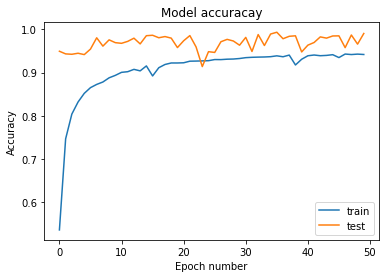

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='test')
plt.title('Model accuracay')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')